In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import glob as glob
import os
%matplotlib inline
import warnings
from matplotlib.ticker import FormatStrFormatter
warnings.filterwarnings('ignore')

In [2]:
def to_seconds(timestamp):
    try: 
        ts = timestamp.split(':')
        return float(float(ts[0])*60*60 + float(ts[1])*60 + float(ts[2]))
    except: return float(0)

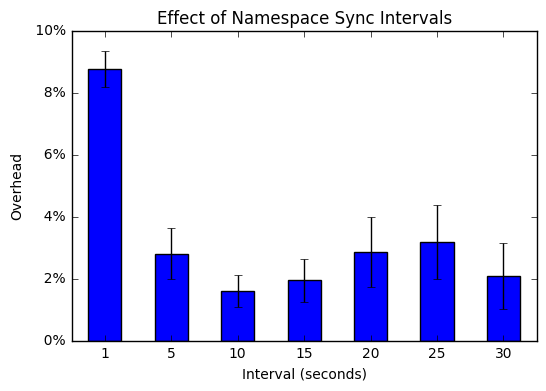

In [124]:
def parse_summary(fname, norm=-1):
    with open(fname) as f:
        df = pd.read_csv(f, names=['job', 'nfiles', 'sync', 'time', 'runtime'])
        if norm == -1:
            df['runtime'] = df['runtime'].apply(to_seconds)
        else:
            df['runtime'] = (1 - norm/df['runtime'].apply(to_seconds))
    df = df[df['job'] == 'save']
    return df

# get the baseline
df = parse_summary('../results-cloudlab/summary.txt')
columns = df['sync']
norm = float(df[df['sync'] == "0"]['runtime'])
del df['job'], df['nfiles'], df['sync'], df['time'], df['runtime']

# read all the runs
for i in range(0, 9):
    d = parse_summary('../results-cloudlab-run' + str(i) + '/summary.txt', norm)
    df[str(i) + "run"] = d['runtime']

# massage the data
df = df.T
df.columns = columns
del df['0']

# plot it
fig, ax = plt.subplots(1, 1)
df.mean().plot(kind='bar', yerr=df.std())
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in ax.get_yticks()])
ax.set_xticklabels(df.columns, rotation=0)
ax.set_ylabel("Overhead")
ax.legend().remove()
ax.set_xlabel("Interval (seconds)")
x = ax.set_title("Effect of Namespace Sync Intervals")
fig.savefig('graphs/slowdown-sync.png', bbox_inches='tight', dpi=400)